In [ ]:
# !pip install -U pandas-profiling
# !pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

In [ ]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

from pandas_profiling import profile_report
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [ ]:
# d_f=pd.read_csv('/content/drive/MyDrive/Internship/Homoye/Project/crimes_against_women_2001-2014_original_data.csv')
# d_f.shape

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Internship/Homoye/Project/crimes_against_women_2001-2014.csv')
data.head()

Unnamed: 0  ... Importation of Girls
0           0  ...                    0
1           1  ...                    0
2           2  ...                    0
3           3  ...                    0
4           4  ...                    0

[5 rows x 11 columns]

### Exploratory Data Analysis (EDA):
In this part of work, we are going to perform **linearity** and **collinearity** tests on the data, **correlation** and **box plots**, as well as data interpretation and charts.

In [ ]:
data.shape

(10677, 11)

In [ ]:
data.keys()

Index(['Unnamed: 0', 'STATE/UT', 'DISTRICT', 'Year', 'Rape',
       'Kidnapping and Abduction', 'Dowry Deaths',
       'Assault on women with intent to outrage her modesty',
       'Insult to modesty of Women', 'Cruelty by Husband or his Relatives',
       'Importation of Girls'],
      dtype='object')

In [ ]:
# check data type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10677 entries, 0 to 10676
Data columns (total 11 columns):
 #   Column                                               Non-Null Count  Dtype 
---  ------                                               --------------  ----- 
 0   Unnamed: 0                                           10677 non-null  int64 
 1   STATE/UT                                             10677 non-null  object
 2   DISTRICT                                             10677 non-null  object
 3   Year                                                 10677 non-null  int64 
 4   Rape                                                 10677 non-null  int64 
 5   Kidnapping and Abduction                             10677 non-null  int64 
 6   Dowry Deaths                                         10677 non-null  int64 
 7   Assault on women with intent to outrage her modesty  10677 non-null  int64 
 8   Insult to modesty of Women                           10677 non-null  int64 


In [ ]:
# statistics description
data.describe().T

count  ...      max
Unnamed: 0                                          10677.0  ...   9016.0
Year                                                10677.0  ...   2014.0
Rape                                                10677.0  ...   5076.0
Kidnapping and Abduction                            10677.0  ...  10626.0
Dowry Deaths                                        10677.0  ...   2469.0
Assault on women with intent to outrage her mod...  10677.0  ...  10001.0
Insult to modesty of Women                          10677.0  ...   4970.0
Cruelty by Husband or his Relatives                 10677.0  ...  23278.0
Importation of Girls                                10677.0  ...     83.0

[9 rows x 8 columns]

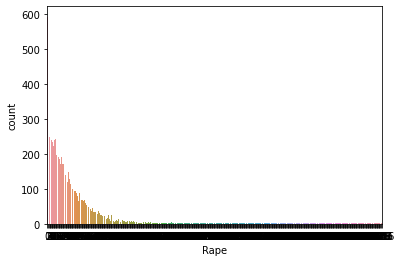

In [ ]:
sns.countplot(data['Rape']);

In [ ]:
data['Importation of Girls'].count()

10677

In [ ]:
data['STATE/UT'].unique()

array(['ANDHRA PRADESH', 'ARUNACHAL PRADESH', 'ASSAM', 'BIHAR',
       'CHHATTISGARH', 'GOA', 'GUJARAT', 'HARYANA', 'HIMACHAL PRADESH',
       'JAMMU & KASHMIR', 'JHARKHAND', 'KARNATAKA', 'KERALA',
       'MADHYA PRADESH', 'MAHARASHTRA', 'MANIPUR', 'MEGHALAYA', 'MIZORAM',
       'NAGALAND', 'ODISHA', 'PUNJAB', 'RAJASTHAN', 'SIKKIM',
       'TAMIL NADU', 'TRIPURA', 'UTTAR PRADESH', 'UTTARAKHAND',
       'WEST BENGAL', 'A & N ISLANDS', 'CHANDIGARH', 'D & N HAVELI',
       'DAMAN & DIU', 'DELHI', 'LAKSHADWEEP', 'PUDUCHERRY',
       'Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar',
       'Chhattisgarh', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh',
       'Jammu & Kashmir', 'Jharkhand', 'Karnataka', 'Kerala',
       'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram',
       'Nagaland', 'Odisha', 'Punjab', 'Rajasthan', 'Sikkim',
       'Tamil Nadu', 'Tripura', 'Uttar Pradesh', 'Uttarakhand',
       'West Bengal', 'A&N Islands', 'Chandigarh', 'D&N Haveli',
       '

In [ ]:
# check if there is duplicated values
print(data['STATE/UT'].duplicated().any())
print(data.duplicated().any())

True
False


In [ ]:
count_= len(data['STATE/UT'].unique())
print(f'The nmber of States with duplicates values is: {count_}')

The nmber of States with duplicates values is: 72


In [ ]:
# Remove duplicate 
data['STATE/UT'] = data.apply(lambda row:row['STATE/UT'].replace(" ", "").upper(), axis=1)
data['STATE/UT'].replace('delhiut','delhi', inplace=True)

In [ ]:
# count the nber of state
states= data['STATE/UT'].unique()
count_states = len(states)
print(states)
print(f'The total number of satates is: {count_states}')

['ANDHRAPRADESH' 'ARUNACHALPRADESH' 'ASSAM' 'BIHAR' 'CHHATTISGARH' 'GOA'
 'GUJARAT' 'HARYANA' 'HIMACHALPRADESH' 'JAMMU&KASHMIR' 'JHARKHAND'
 'KARNATAKA' 'KERALA' 'MADHYAPRADESH' 'MAHARASHTRA' 'MANIPUR' 'MEGHALAYA'
 'MIZORAM' 'NAGALAND' 'ODISHA' 'PUNJAB' 'RAJASTHAN' 'SIKKIM' 'TAMILNADU'
 'TRIPURA' 'UTTARPRADESH' 'UTTARAKHAND' 'WESTBENGAL' 'A&NISLANDS'
 'CHANDIGARH' 'D&NHAVELI' 'DAMAN&DIU' 'DELHI' 'LAKSHADWEEP' 'PUDUCHERRY'
 'DELHIUT' 'TELANGANA']
The total number of satates is: 37


We have titaly 37 states.

In [ ]:
# checking missing values
data.isnull().sum()

Unnamed: 0                                             0
STATE/UT                                               0
DISTRICT                                               0
Year                                                   0
Rape                                                   0
Kidnapping and Abduction                               0
Dowry Deaths                                           0
Assault on women with intent to outrage her modesty    0
Insult to modesty of Women                             0
Cruelty by Husband or his Relatives                    0
Importation of Girls                                   0
dtype: int64

In [ ]:
#  Remove unknown variable
data = data.drop(['Unnamed: 0'], axis=1)

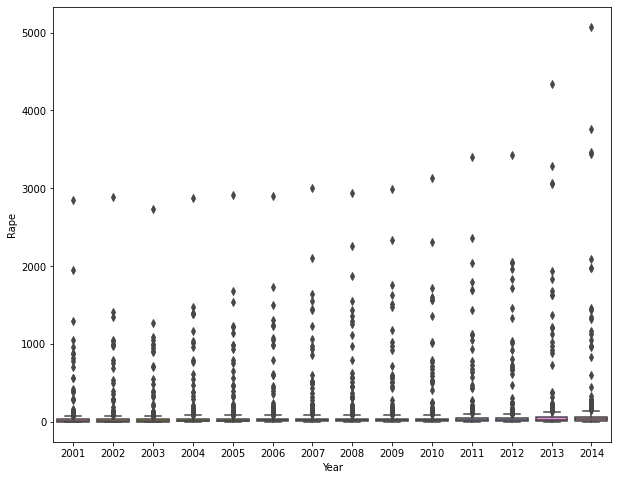

In [ ]:
#  Box plot 
plt.figure(figsize=(10,8))
sns.boxplot(x='Year', y='Rape', data=data)
plt.show()

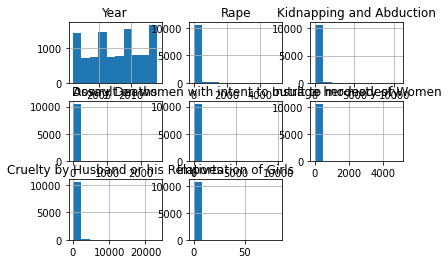

In [ ]:
df = data.drop(['STATE/UT', 'DISTRICT'], axis=1)
df.hist(bins=10)
plt.show()

In [ ]:
#  Let check the summary of the data

data_report = data.profile_report()
data_report.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

**Correlation Matrix**

In [ ]:
corr = data.corr()
corr

Year  ...  Importation of Girls
Year                                                1.000000  ...             -0.028462
Rape                                                0.052522  ...              0.223290
Kidnapping and Abduction                            0.095102  ...              0.130405
Dowry Deaths                                        0.007497  ...              0.283636
Assault on women with intent to outrage her mod...  0.050482  ...              0.115706
Insult to modesty of Women                         -0.009024  ...              0.031304
Cruelty by Husband or his Relatives                 0.059667  ...              0.132135
Importation of Girls                               -0.028462  ...              1.000000

[8 rows x 8 columns]

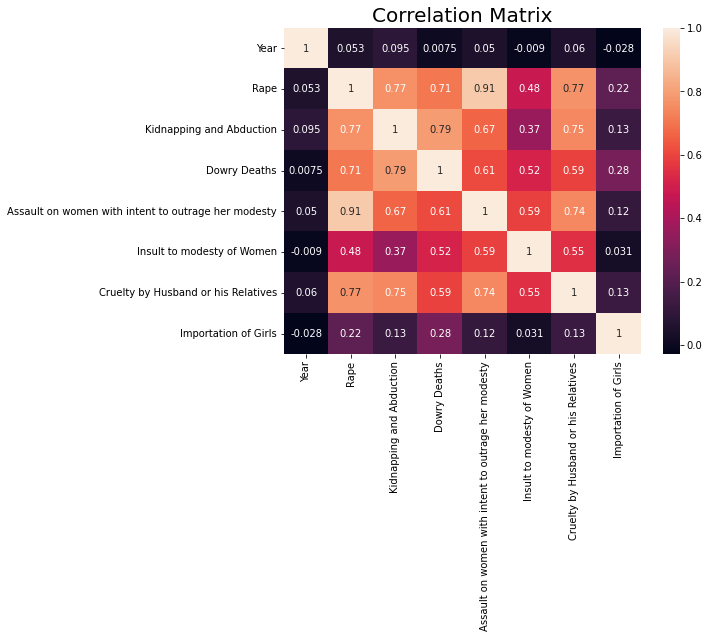

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True)
plt.title('Correlation Matrix', fontsize=20)
plt.show()

From this figure , we can notice that there is a strong relationship between **rape** and **Assault on women with intent to outrage her modesty**.
There is also positive relationship between (Rape and  Cruelty by Husband or his Relatives), (Rape and Kidnapping and Abduction), (Rape and Dowry Deaths),(Rape and  Dowry Deaths and Kidnapping and Abduction).

All the others variables are well correlated.

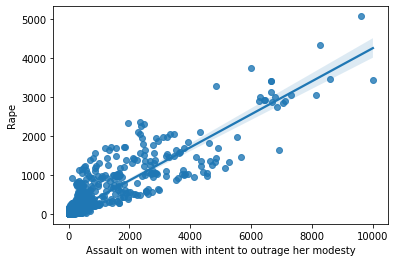

In [ ]:
sns.regplot(x='Assault on women with intent to outrage her modesty', y='Rape', data=data)

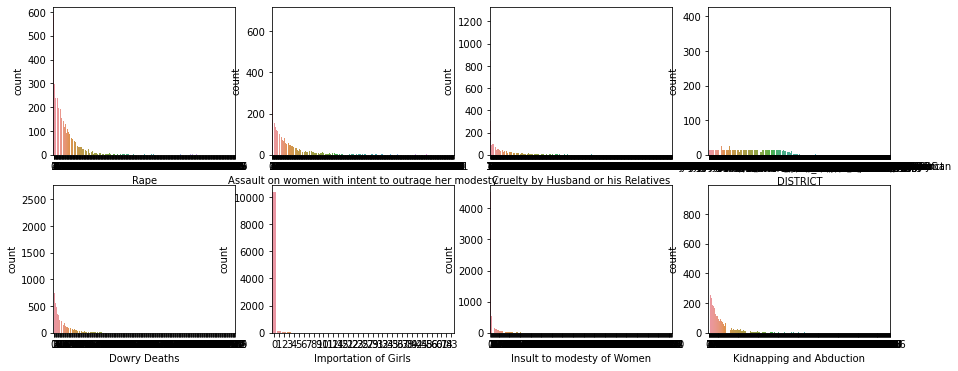

In [ ]:
plt.figure(figsize=(15,6))
plt.subplot(241)
sns.countplot(data['Rape'])

plt.subplot(242)
sns.countplot(data['Assault on women with intent to outrage her modesty'])

plt.subplot(243)
sns.countplot(data['Cruelty by Husband or his Relatives'])

plt.subplot(244)
sns.countplot(data['DISTRICT'])

plt.subplot(245)
sns.countplot(data['Dowry Deaths'])

plt.subplot(246)
sns.countplot(data['Importation of Girls'])

plt.subplot(247)
sns.countplot(data['Insult to modesty of Women'])

plt.subplot(248)
sns.countplot(data['Kidnapping and Abduction'])

plt.show()

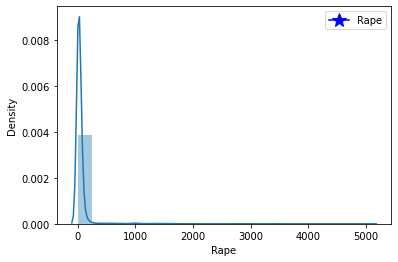

In [ ]:
# histogram and Probability Density Function(PDF) of spei
import matplotlib.lines as mlines


sns.distplot(data.Rape, bins=20)
blue_line = mlines.Line2D([], [], color='blue', marker='*',
                          markersize=15, label='Rape')
plt.legend(handles=[blue_line])
# plt.legend()
plt.show()

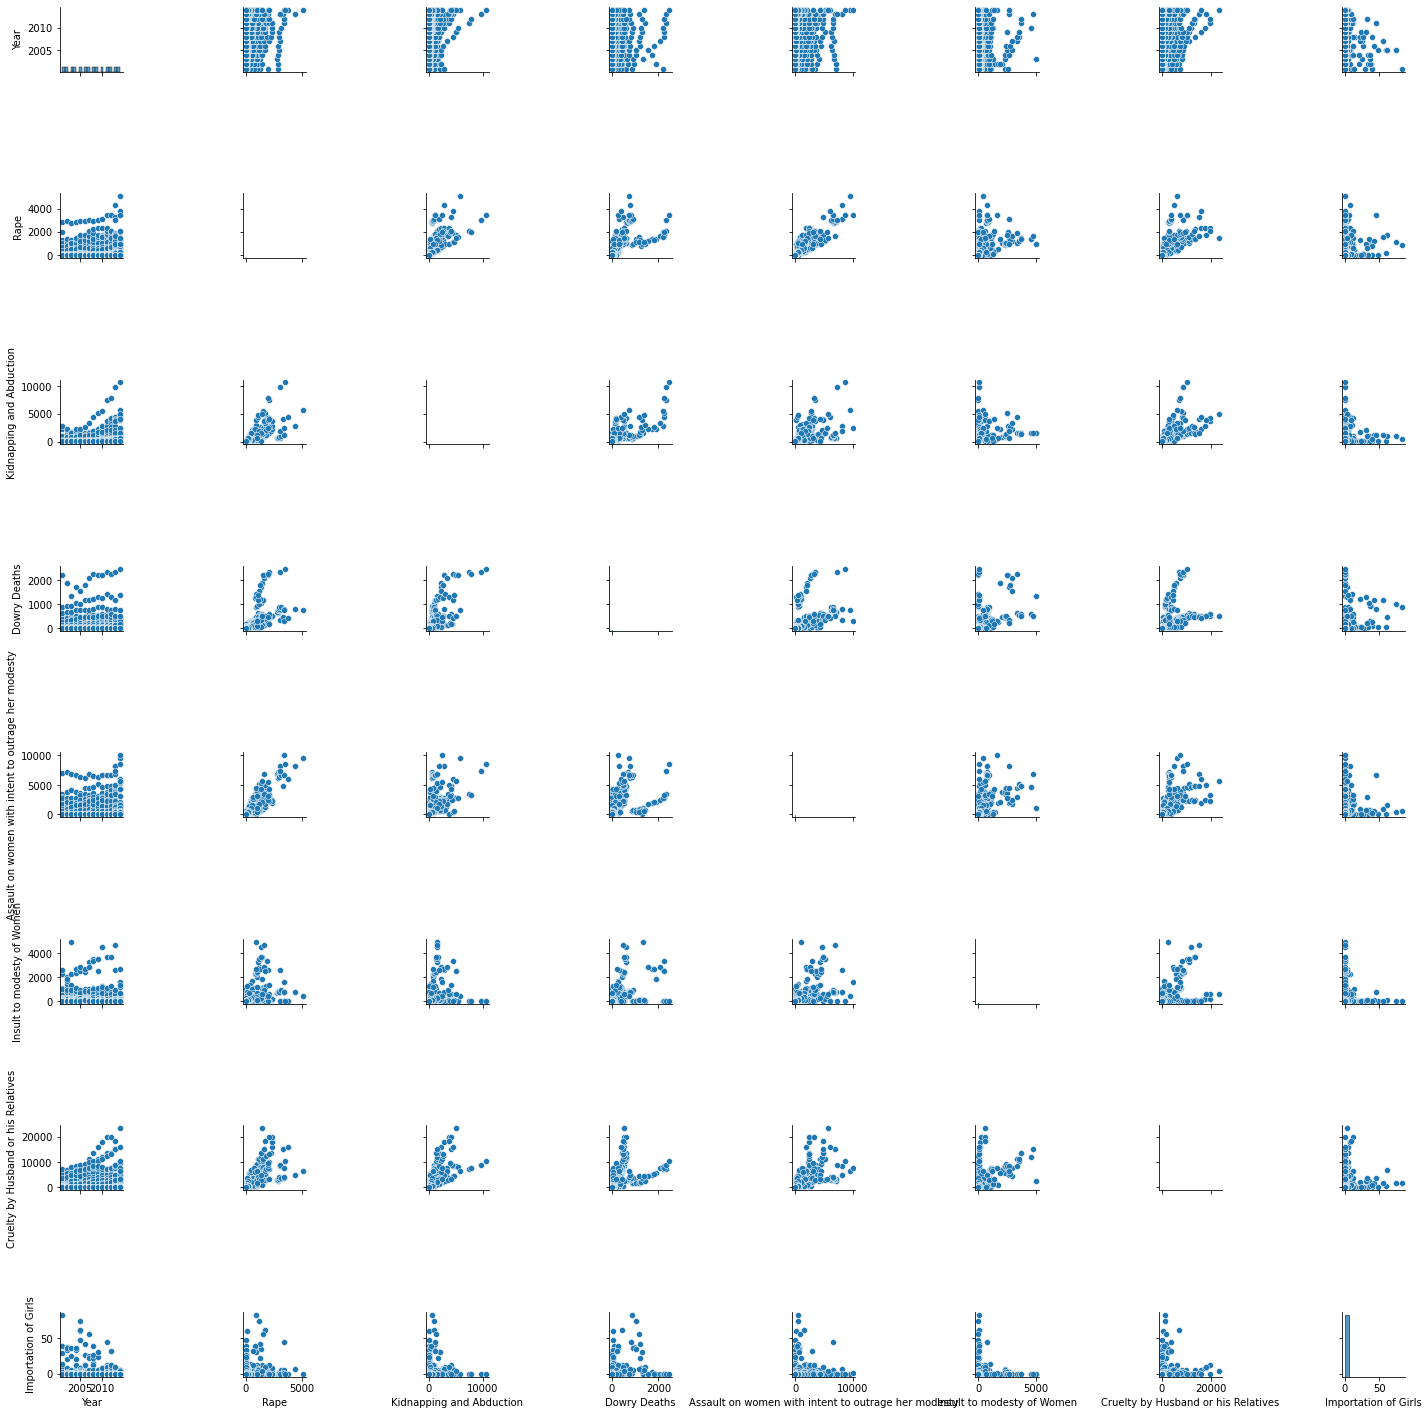

In [ ]:
# correlation between variables
sns.pairplot(data)
plt.show()

In [ ]:
import plotly.express as px


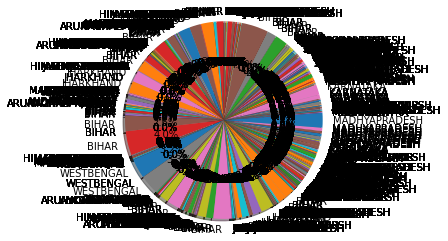

In [ ]:
# Program 3: 
labels = data['STATE/UT']
# explode = (0,0,0.5,0,0.8,0,0,0)
# colors = ['yellowgreen','gold','lightskyblue','lightcoral']
plt.pie(data['Importation of Girls'] #, explode=explode  # fraction of the radius with which to offset each wedge
        , labels=labels,
        # colors=colors,
        autopct='%.1f%%', # string or function used to label the wedges with their numeric value
        shadow=True,
        startangle=45, # rotate the start of the pie chart by angle degrees counterclockwise from the x-axis
        )
plt.axis('equal')  # turns off the axis lines and labels
# plt.title('Web browser maketshare - 2021')
plt.show()